<a href="https://colab.research.google.com/github/Anupa-123/Mobile-Price-Classification/blob/main/Mobile_Price_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mobile Price Range Prediction**

**In the competitive mobile phone market companies want
to understand sales data of mobile phones and factors which drive the prices.
The objective is to find out some relation between features of a mobile phone(eg:- RAM,
Internal Memory, etc) and its selling price. In this problem, we do not have to predict the
actual price but a price range indicating how high the price is.**

Data Description -
Battery_power - Total energy a battery can store in one time measured in mAh

Blue - Has bluetooth or not

Clock_speed - speed at which microprocessor executes instructions

Dual_sim - Has dual sim support or not

Fc - Front Camera mega pixels

Four_g - Has 4G or not

Int_memory - Internal Memory in Gigabytes

M_dep - Mobile Depth in cm

Mobile_wt - Weight of mobile phone

N_cores - Number of cores of processor

Pc - Primary Camera mega pixels

Px_height - Pixel Resolution Height

Px_width - Pixel Resolution Width

Ram - Random Access Memory in Mega Bytes

Sc_h - Screen Height of mobile in cm

Sc_w - Screen Width of mobile in cm

Talk_time - longest time that a single battery charge 
will last when you are

Three_g - Has 3G or not

Touch_screen - Has touch screen or not

Wifi - Has wifi or not

Price_range - This is the target variable with value of 0(low cost), 1(medium cost),
2(high cost) and 3(very high cost).

# **Import the libraries**

In [141]:
# importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# setting max display column limit to 30
pd.set_option("display.max_columns", 30)

#set style
# plt.style.use('seaborn')
sns.set()
import warnings
warnings.filterwarnings('ignore')

# **Load The Dataset**

In [142]:
# Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [143]:
# CSV file loaction path
df = pd.read_csv('/content/drive/MyDrive/data_mobile_price_range.csv')

In [144]:
#shape of the dataset
df.shape

(2000, 21)

Our data set has 2000 rows and 21 columns

In [145]:
#Dispaly all columns information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

* We don't have any object data type in our data set.

* Also we have Zero null values in data set.
  
* Price_range is our target variable.


In [146]:
# Display first top 5 rows
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [147]:
# Display last 5 rows
df.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,16,483,754,3919,19,4,2,1,1,1,3


In [148]:
# Discription of dataset
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [149]:
# Checking Statistic of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


**Data Summary**

* The describe function describes the every aspect of the dataset provided.

* Minimum and maximum values, mean, count, standard deviation etc.

* The dataset has 21 features and 2,000 rows in total.

* The last column is given the target variable to work our models up on.

* There is no data in any datatype except float and integer.

* This dataset contains a mix of categorical, continuous and discrete data.

* All the categorical variables are pre-encoded which saves a lot of our time.

In [150]:
#The nunique () method returns the number of unique values for each column
df.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

**Checking null values**

In [151]:
 #This function return sum of null values of columns
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

**Checking duplicate values**

In [152]:
#Returns is any duplicates rows has in our dataset.
df.duplicated().any()

False

Text(0.5, 1.0, ' Visualising Missing Values')

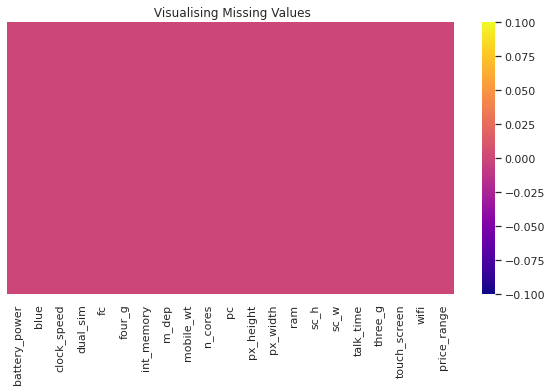

In [153]:
# Visulaizing null values using heatmap.
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(),cmap='plasma',annot=False,yticklabels=False)
plt.title(" Visualising Missing Values")

**Observations:**


*   There is no null/missing value in this training data set.
*  There is no duplicate value in this data set. 



# **Exploratory Data Analysis(EDA)**

**Let's have look at target variable first.!**

In [154]:
# lets have look at our target variable's counts
price_range_values=df['price_range'].value_counts()
price_range_values

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

We have almost equal number of obseravtions for each category. Thus we don't have imbalanced target variable.Accuracy score will be the best evalaution metric for us to select the model.

This is the target variable with value of:

*0=low cost,*

*1=medium cost,*

*2=high cost,*

*3=very high cost.*  




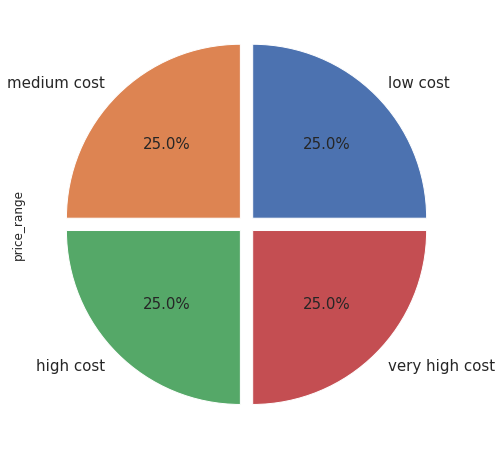

In [155]:
# Visualizing the Target variable's class distribution.
labels = ["low cost", "medium cost", "high cost", "very high cost"]
price_range_values.plot.pie(explode=[0.05]*4,labels=labels,autopct='%1.1f%%',figsize=(12,8),fontsize=15)    # plotting pie chart

We can see that our target varibale is equally distributed. Thus we don't have to worry about data imbalance and there is no need of oversampling or undersampling.Which is good for us.



**Univariate Analysis**

Uni means one and this means that the data has only one kind of variable. The major reason for univariate analysis is to use the data to describe.

**Price range count of mobile phones**

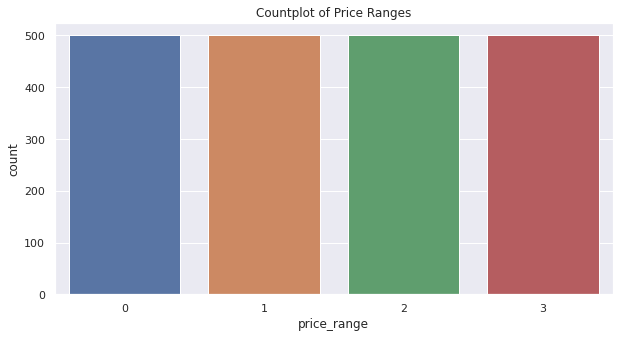

In [156]:
plt.figure(figsize=(10,5))
sns.countplot(df['price_range'])
plt.title('Countplot of Price Ranges')
plt.show()

There are mobile phones in 4 price ranges. The number of elements is almost similar.

**Find how many device have bluetooth**

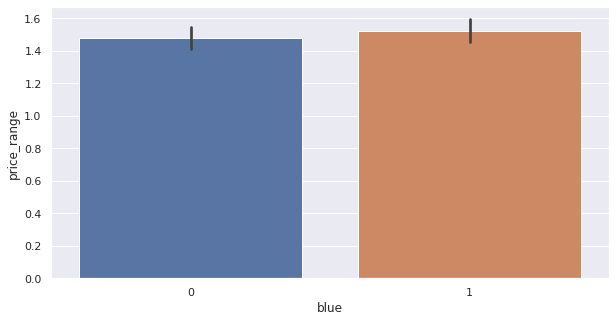

In [157]:
#anlaysis of data by vizualisation
fig,ax=plt.subplots(figsize=(10,5))
sns.barplot(data=df,x='blue',y='price_range',ax=ax)


Here we can see that half the devices have Bluetooth, and half don’t.

**Find how many device have dual sim**

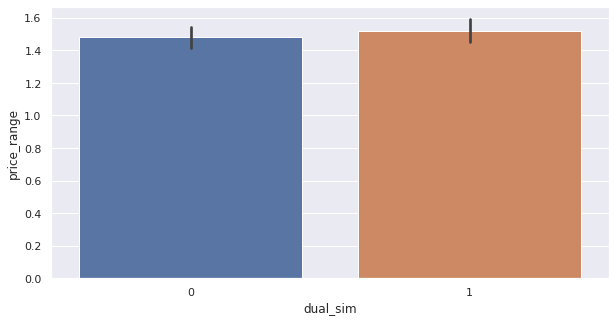

In [158]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(10,5))
sns.barplot(data=df,x='dual_sim',y='price_range',ax=ax)


Here we can see that half the devices are dual,and half are not.

**Find how many devices have three_g**

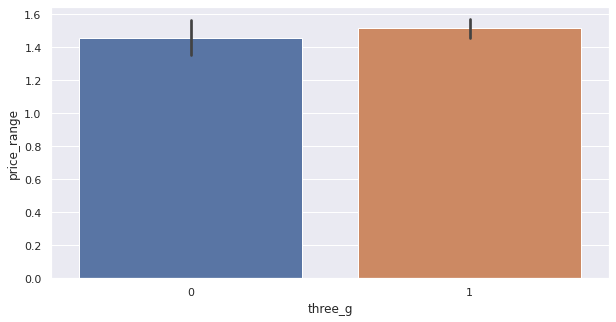

In [159]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(10,5))
sns.barplot(data=df,x='three_g',y='price_range',ax=ax)

**Bivariate Analysis**

Bivariate analysis is one of the simplest forms of quantitative (statistical) analysis. It involves the analysis of two variables.

**How price range affect according to the talk time**

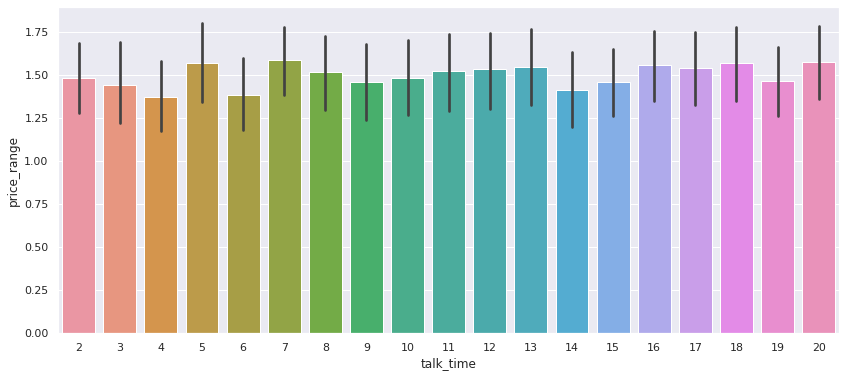

In [160]:
plt.figure(figsize=(14,6))
sns.barplot(data = df , x ='talk_time' , y= 'price_range' )


Talk time increases with increasing of price range.

**Price range according to ram**

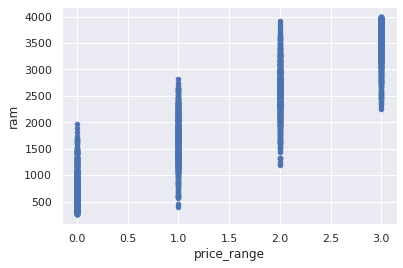

In [161]:
df.plot(x='price_range',y='ram',kind='scatter')
plt.show()
     

Ram has continuous increase with price range while moving from Low cost to Very high cost.

**Check mobiles which have bluetooth features**

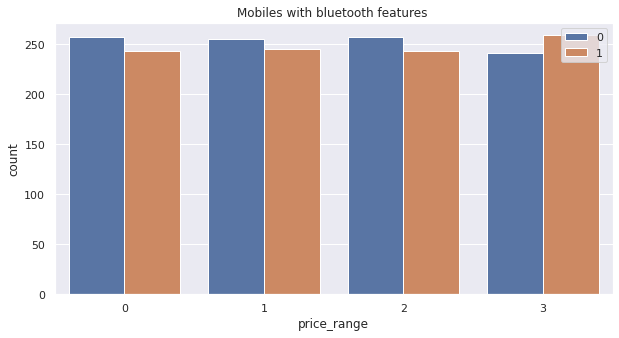

In [162]:

plt.figure(figsize=(10, 5))
sns.countplot(df['price_range'],hue=df['blue'])
plt.title("Mobiles with bluetooth features ")
plt.legend(loc='best')


Majority of phones of price range from 0 to 2 dont have bluetooth on other hand price range of 3 have bluetooth service.

**Check price range with pixel width**

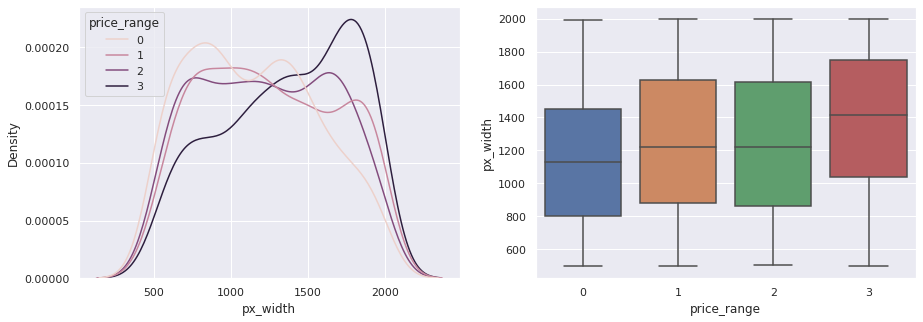

In [163]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=df, x='px_width', hue='price_range', ax=axs[0])
sns.boxplot(data=df, x='price_range', y='px_width', ax=axs[1])
plt.show()


There is not a continuous increase in pixel width as we move from Low cost to Very high cost. Mobiles with 'Medium cost' and 'High cost' has almost equal pixel width. so we can say that it would be a driving factor in deciding price_range.

**Check price range with mobile weight**

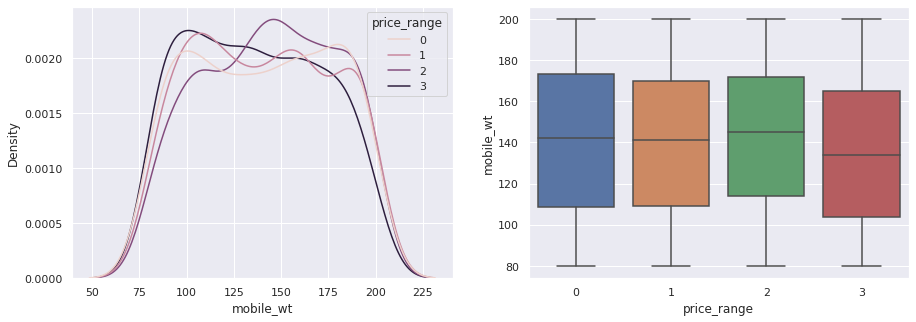

In [164]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=df, x='mobile_wt', hue='price_range', ax=axs[0])
sns.boxplot(data=df, x='price_range', y='mobile_wt', ax=axs[1])
plt.show()

costly phones are lighter

**Multivariate analyis**

**Checking the counts of numerical columns by grouping price range.**

In [165]:
grup_by_price=df.groupby(['price_range']).agg({'blue':'value_counts','dual_sim':'value_counts','four_g':'value_counts','three_g':'value_counts','touch_screen':'value_counts','wifi':'value_counts'}).unstack()
     

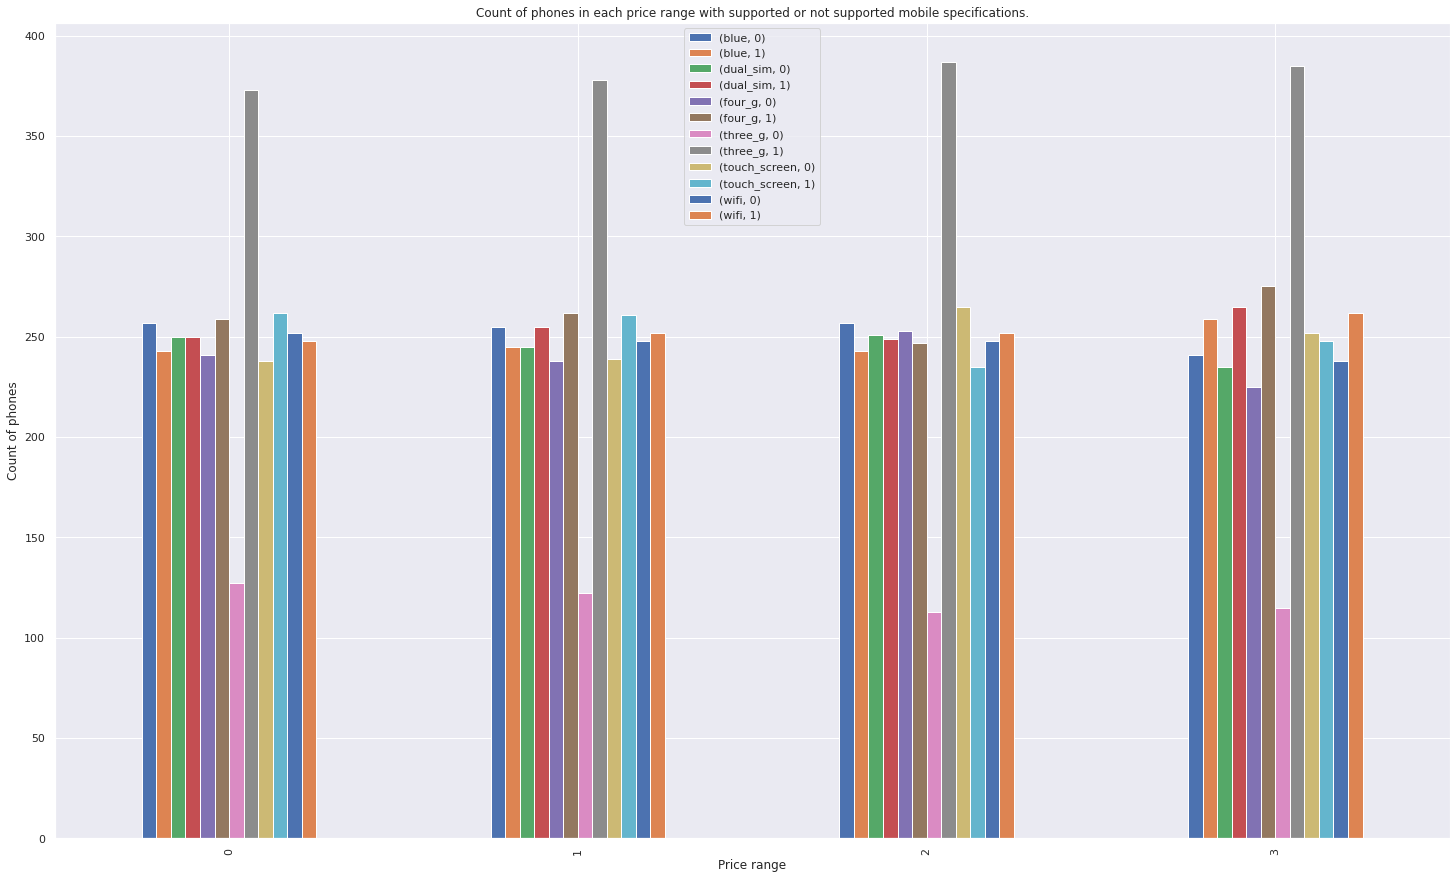

In [166]:
# visualising by plotting barchat.
# plt.figure(figsize=(12,6))
grup_by_price.plot.bar(figsize=(25,15))
plt.title('Count of phones in each price range with supported or not supported mobile specifications.')
plt.xlabel('Price range')
plt.ylabel('Count of phones')
plt.legend(loc='upper center')

We can see that each price range category has equal number of mobiles phones having both supporting and non supporting specifications.

**Price range Vs all numerical factor**

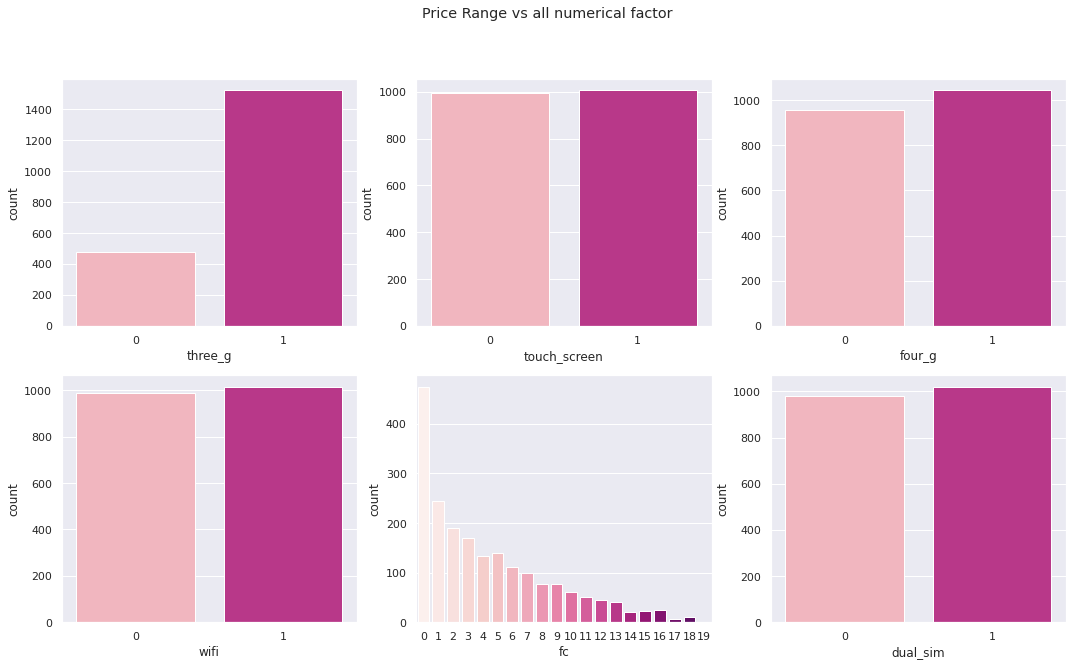

In [167]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Price Range vs all numerical factor')
sns.countplot(ax=axes[0, 0], data=df, x='three_g',palette='RdPu')
sns.countplot(ax=axes[0, 1], data=df, x='touch_screen',palette='RdPu')
sns.countplot(ax=axes[0, 2], data=df, x='four_g',palette='RdPu')
sns.countplot(ax=axes[1, 0], data=df, x='wifi',palette='RdPu')
sns.countplot(ax=axes[1,1],data = df, x ='fc' ,palette='RdPu')
sns.countplot(ax=axes[1,2],data =df, x ='dual_sim',palette='RdPu' )
plt.show()

**Checking the multi-collinearity**

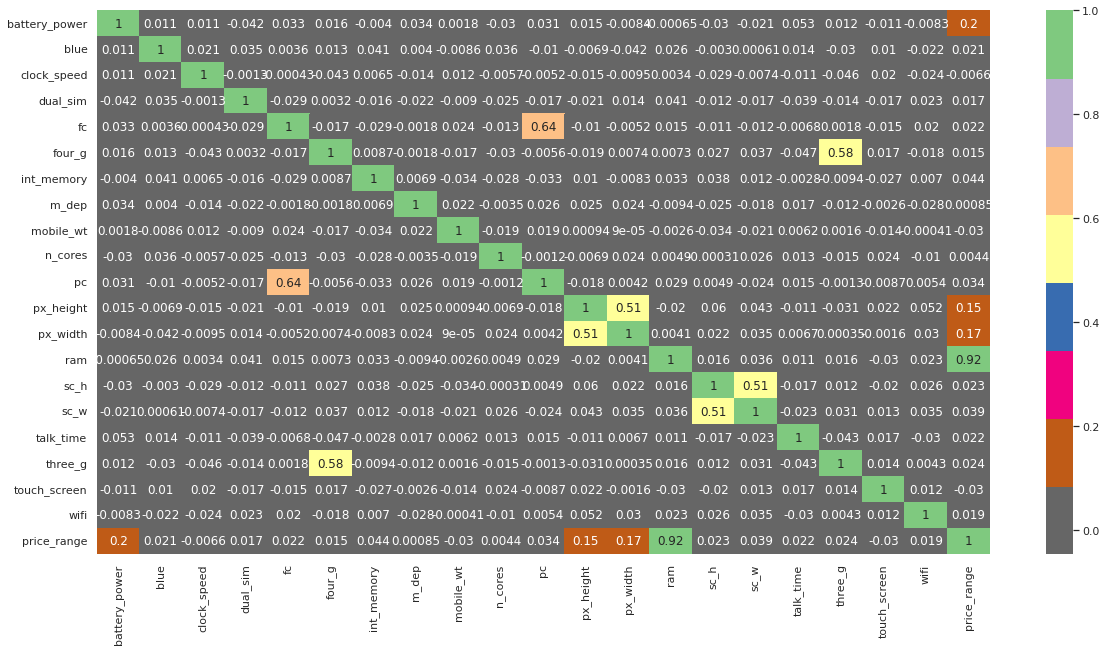

In [168]:
corr= df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True, cmap=plt.cm.Accent_r)

RAM has strong positive correlation with the Price_range. and we know that Mobiles with high RAM are very costly. Thus RAM increases price range also increase.*

*Battery_power also has positive correlation with the price range.Generally mobiles having high prices comes with good battery power.*

*Also px_height and px_width (Pixel Resolution Height and width) are positively correlated. Generally High price range mobiles have good resolutions.*

*Four_g and Three_g are highly positvely correlated. Nowdays most of the smart mobiles has both type of options. This could be the reason that they are correlated.*

*primary camera i.e pc and front camera fc are positively correlated.*

*sc_h and sc_w are positively correlated.*



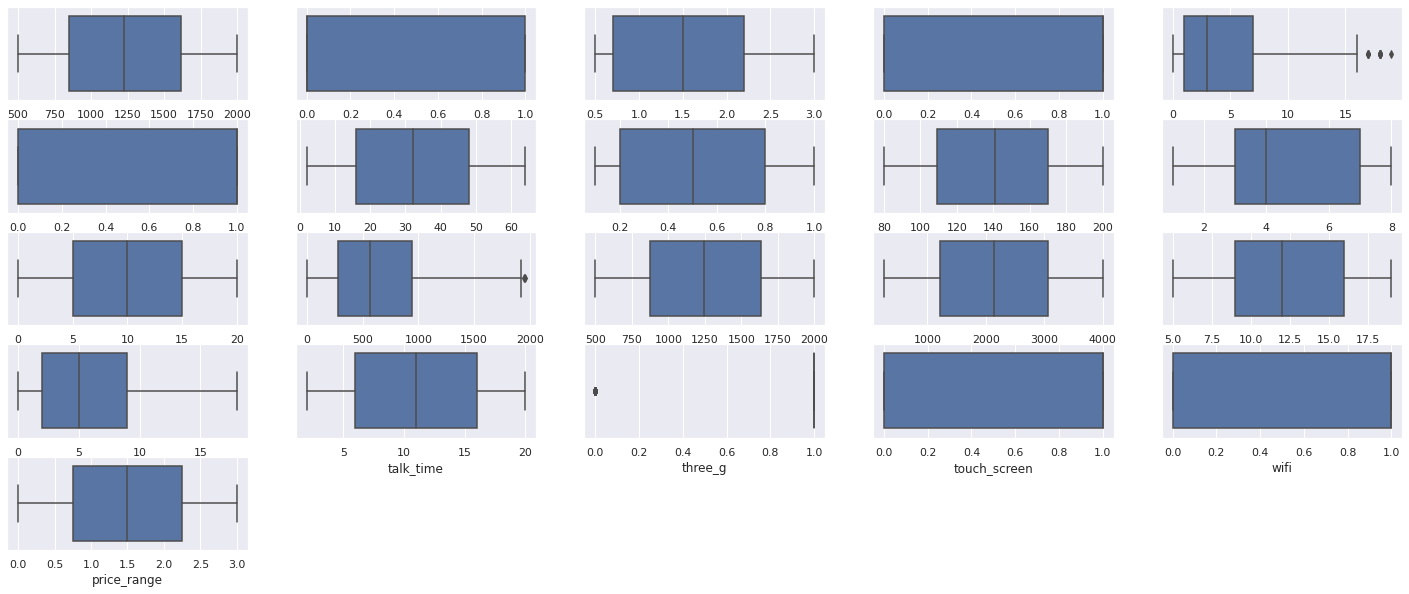

In [169]:
# looking for outliers using box plot
plt.figure(figsize=(25,10))
for index,item in enumerate([i for i in df.describe().columns.to_list()] ):
  plt.subplot(5,5,index+1)
  sns.boxplot(df[item])
print("\n")

There are no much outliers

**Feature Selection**

In [170]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [171]:
x = df.drop('price_range',axis=1) # x variable stores the independent variables.
y = df['price_range'] #y store the dependent variable.

In [172]:
ordered_rank_features = SelectKBest(score_func=chi2,k=20)
ordered_feature = ordered_rank_features.fit(x,y)

In [173]:
dfscores = pd.DataFrame(ordered_feature.scores_,columns=["Score"])
dfcolumns = pd.DataFrame(x.columns)

In [174]:
dfscores = pd.DataFrame(ordered_feature.scores_,columns=["Score"])
dfcolumns = pd.DataFrame(x.columns)

In [175]:
features_rank=pd.concat([dfcolumns,dfscores],axis=1)
features_rank.columns=['Features','Score']
features_rank

,Features,Score
0,battery_power,14129.866576
1,blue,0.723232
2,clock_speed,0.648366
3,dual_sim,0.631011
4,fc,10.135166
5,four_g,1.521572
6,int_memory,89.839124
7,m_dep,0.745820
8,mobile_wt,95.972863
9,n_cores,9.097556


**Take top 10 features variables.**

In [176]:
features_rank.nlargest(10,'Score')

,Features,Score
13,ram,931267.519053
11,px_height,17363.569536
0,battery_power,14129.866576
12,px_width,9810.586750
8,mobile_wt,95.972863
6,int_memory,89.839124
15,sc_w,16.480319
16,talk_time,13.236400
4,fc,10.135166
14,sc_h,9.614878


# Split the dataset into train and test

In [177]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [178]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1500, 20)
(500, 20)
(1500,)
(500,)


In [179]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [180]:
# Scaling the data.
# creating an object of MinMax Scaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)   # fitting the X_train
X_test_scaled=scaler.transform(X_test)         # transforming X_test
     

In [181]:
X_train_scaled

array([[-1.58954736, -0.97628121, -0.54409463, ..., -1.77951304,
         1.01072417, -1.02840321],
       [-1.06204271,  1.02429504, -0.42202734, ...,  0.56195149,
         1.01072417, -1.02840321],
       [ 1.31059626,  1.02429504, -0.29996004, ...,  0.56195149,
         1.01072417,  0.97238125],
       ...,
       [-0.09759213, -0.97628121,  0.55451104, ..., -1.77951304,
        -0.98938962,  0.97238125],
       [-0.09532817, -0.97628121,  1.04278023, ...,  0.56195149,
         1.01072417,  0.97238125],
       [-1.19335288, -0.97628121, -1.27649842, ...,  0.56195149,
        -0.98938962,  0.97238125]])

In [182]:
X_test_scaled

array([[ 0.50009554,  1.02429504, -1.27649842, ...,  0.56195149,
         1.01072417, -1.02840321],
       [-0.31946105,  1.02429504, -1.27649842, ..., -1.77951304,
         1.01072417, -1.02840321],
       [ 0.65857334,  1.02429504,  0.31037645, ...,  0.56195149,
        -0.98938962,  0.97238125],
       ...,
       [ 1.19060593,  1.02429504, -0.17789274, ...,  0.56195149,
         1.01072417, -1.02840321],
       [-1.62803483,  1.02429504,  0.06624185, ...,  0.56195149,
         1.01072417,  0.97238125],
       [ 0.40048093,  1.02429504, -1.27649842, ...,  0.56195149,
         1.01072417, -1.02840321]])

# Feature Scaling

In [183]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [184]:
X_train

array([[-1.58954736, -0.97628121, -0.54409463, ..., -1.77951304,
         1.01072417, -1.02840321],
       [-1.06204271,  1.02429504, -0.42202734, ...,  0.56195149,
         1.01072417, -1.02840321],
       [ 1.31059626,  1.02429504, -0.29996004, ...,  0.56195149,
         1.01072417,  0.97238125],
       ...,
       [-0.09759213, -0.97628121,  0.55451104, ..., -1.77951304,
        -0.98938962,  0.97238125],
       [-0.09532817, -0.97628121,  1.04278023, ...,  0.56195149,
         1.01072417,  0.97238125],
       [-1.19335288, -0.97628121, -1.27649842, ...,  0.56195149,
        -0.98938962,  0.97238125]])

# Predictive Modeling:

Algorithms used for predictive modeling:

1)Decision Tree

2)Random Forest classifier

3)Gradient Boosting Classifier

4)K-nearest Neighbour classifier

5)XG Boost Classifier

6)Support Vector Machine(SVM)

In [185]:

# importing all essential libraries.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix,confusion_matrix,roc_curve,roc_auc_score,auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix



#1) Logistic Regression

In [186]:
# Applying logistic regression

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)




LogisticRegression()

In [187]:
# Prediction

y_pred_test = lr.predict(X_test)
y_pred_train = lr.predict(X_train)
# Evaluation metrics for test

In [188]:
from sklearn.metrics import classification_report
print('Classification report for Logistic Regression (Test set)= ')
print(classification_report(y_pred_test, y_test))

Classification report for Logistic Regression (Test set)= 
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       125
           1       0.94      0.94      0.94       110
           2       0.93      0.96      0.94       121
           3       0.99      0.97      0.98       144

    accuracy                           0.96       500
   macro avg       0.96      0.96      0.96       500
weighted avg       0.96      0.96      0.96       500



[[122   2   0   0]
 [  3 103   4   0]
 [  0   5 116   4]
 [  0   0   1 140]]


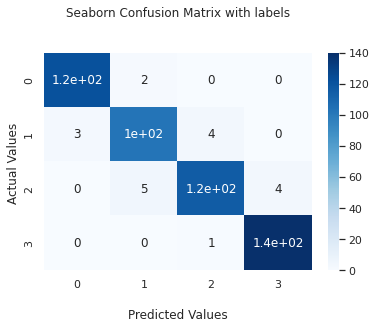

In [189]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_test)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()

In [190]:
# Evaluation metrics for train

from sklearn.metrics import classification_report
print('Classification report for Logistic Regression (Train set)= ')
print( classification_report(y_pred_train, y_train))
     

Classification report for Logistic Regression (Train set)= 
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       381
           1       0.97      0.97      0.97       389
           2       0.97      0.98      0.97       371
           3       0.99      0.99      0.99       359

    accuracy                           0.98      1500
   macro avg       0.98      0.98      0.98      1500
weighted avg       0.98      0.98      0.98      1500



In [191]:
from sklearn.metrics import accuracy_score
acc1 = accuracy_score(y_test, y_pred_test)
print(f"Accuracy score: {acc1}")

Accuracy score: 0.962


# 2)SVM

In [192]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [193]:
y_pred = classifier.predict(X_test)

In [194]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
acc2 = accuracy_score(y_test, y_pred)

[[121   3   0   0]
 [  4 103   3   0]
 [  0   6 114   5]
 [  0   0   2 139]]


In [195]:
print(f"Accuracy score: {acc2}")

Accuracy score: 0.954


In [196]:
# Import all relevant libraries

from sklearn.svm import SVC
     

In [197]:
svc = SVC(random_state=101)      # creating an object of classifier
svc.fit(X_train,y_train)    # fitting the model/training the model.

SVC(random_state=101)

In [198]:
# predicting the y value of train set and test set
y_train_pred=svc.predict(X_train)
y_pred=svc.predict(X_test)


In [199]:
# Accuracy score for train set
accuracy_score(y_train,y_train_pred)

0.9813333333333333

In [200]:
# Accuracy score for test set.
accuracy_score(y_test,y_pred)

0.892

In [201]:
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix
     

array([[118,   6,   0,   0],
       [  6,  97,   7,   0],
       [  0,  15, 106,   4],
       [  0,   0,  16, 125]])

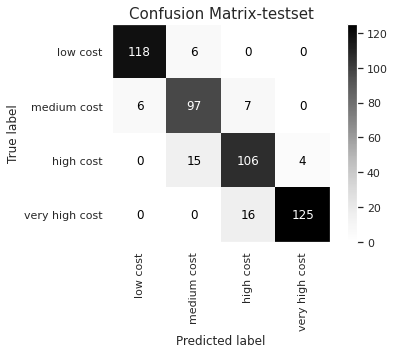

In [202]:
# plotting confusion matrix for test set.
plot_confusion_matrix(svc,X_test,y_test,cmap='Greys',display_labels=Class_cat,xticks_rotation='vertical')
plt.grid(False)
plt.title('Confusion Matrix-testset',fontsize=15)
plt.show()

In [203]:
#printing the classifiaction report of train set.
print(classification_report(y_train,y_train_pred))
     

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       376
           1       0.97      0.98      0.98       390
           2       0.96      0.98      0.97       375
           3       1.00      0.97      0.99       359

    accuracy                           0.98      1500
   macro avg       0.98      0.98      0.98      1500
weighted avg       0.98      0.98      0.98      1500



In [204]:

#printing the classifiaction report of train set.
print(classification_report(y_test,y_pred))
     

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       124
           1       0.82      0.88      0.85       110
           2       0.82      0.85      0.83       125
           3       0.97      0.89      0.93       141

    accuracy                           0.89       500
   macro avg       0.89      0.89      0.89       500
weighted avg       0.90      0.89      0.89       500



**Hyperparameter Tuning**

In [205]:
# parameter grid for GridSearchCv
grid_values = {
    'C':[0.01,0.1,1,10],
    'kernel' : ["linear","poly","rbf","sigmoid"],
    'degree' : [1,3,5,7],
    'gamma' : [0.01,1]
}

In [206]:
# creating an object for classifier
svm  = SVC ()
     

In [207]:
# Hyperparameter tuning with the GrdiSearhCV with cv=5
svm_cv = GridSearchCV(svm, grid_values, cv = 5,verbose=2)
svm_cv.fit(X_train,y_train)     # fitting the data into the model

Fitting 5 folds for each of 128 candidates, totalling 640 fits
[CV] END ........C=0.01, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ........C=0.01, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ........C=0.01, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ........C=0.01, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ........C=0.01, degree=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ..........C=0.01, degree=1, gamma=0.01, kernel=poly; total time=   0.1s
[CV] END ..........C=0.01, degree=1, gamma=0.01, kernel=poly; total time=   0.1s
[CV] END ..........C=0.01, degree=1, gamma=0.01, kernel=poly; total time=   0.1s
[CV] END ..........C=0.01, degree=1, gamma=0.01, kernel=poly; total time=   0.1s
[CV] END ..........C=0.01, degree=1, gamma=0.01, kernel=poly; total time=   0.1s
[CV] END ...........C=0.01, degree=1, gamma=0.01, kernel=rbf; total time=   0.1s
[CV] END ...........C=0.01, degree=1, gamma=0.

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10], 'degree': [1, 3, 5, 7],
                         'gamma': [0.01, 1],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=2)

In [208]:
# getting the best parameters
svm_cv.best_params_
     

{'C': 10, 'degree': 1, 'gamma': 0.01, 'kernel': 'linear'}

In [209]:
# getting the best estimators
svm_cv.best_estimator_
     

SVC(C=10, degree=1, gamma=0.01, kernel='linear')

In [210]:
# applying best parameters to the SVm model.
svm_optimal=SVC(C=10, degree=1, gamma=0.01, kernel='linear',probability=True)
svm_optimal.fit(X_train,y_train)   # fitting the data

SVC(C=10, degree=1, gamma=0.01, kernel='linear', probability=True)

In [211]:
# predicting the y values of train and test set.
y_train_pred=svm_optimal.predict(X_train)    
y_pred=svm_optimal.predict(X_test)
     

In [212]:
y_train_pred

array([2, 2, 3, ..., 3, 0, 1])

In [213]:
y_pred

array([3, 0, 2, 2, 3, 0, 0, 3, 3, 1, 1, 3, 0, 2, 3, 0, 3, 2, 2, 1, 0, 0,
       3, 1, 2, 2, 3, 1, 3, 1, 1, 0, 2, 0, 1, 3, 0, 0, 3, 3, 2, 1, 3, 3,
       1, 3, 0, 1, 3, 1, 1, 3, 0, 3, 0, 2, 2, 2, 0, 3, 3, 1, 3, 2, 1, 2,
       3, 2, 2, 2, 3, 2, 1, 0, 1, 3, 2, 2, 1, 2, 3, 3, 3, 0, 0, 0, 2, 1,
       2, 3, 1, 2, 2, 1, 0, 3, 3, 3, 0, 3, 1, 1, 3, 2, 3, 2, 2, 3, 2, 3,
       3, 0, 0, 1, 3, 3, 0, 0, 1, 0, 0, 3, 2, 2, 1, 1, 1, 1, 0, 2, 1, 3,
       3, 3, 3, 3, 3, 2, 0, 1, 1, 2, 1, 3, 0, 3, 0, 0, 2, 0, 1, 1, 1, 1,
       3, 1, 0, 3, 1, 3, 2, 1, 3, 1, 2, 3, 3, 2, 1, 0, 3, 1, 2, 3, 3, 0,
       2, 2, 3, 0, 2, 1, 0, 1, 2, 1, 2, 0, 3, 3, 1, 1, 0, 2, 3, 0, 1, 2,
       2, 0, 3, 3, 3, 1, 2, 3, 3, 3, 0, 0, 0, 2, 3, 3, 0, 0, 1, 3, 2, 3,
       3, 3, 0, 0, 2, 2, 3, 1, 0, 2, 0, 0, 0, 3, 2, 1, 2, 2, 1, 1, 0, 2,
       3, 3, 0, 0, 1, 3, 3, 1, 3, 0, 3, 1, 1, 0, 2, 3, 3, 2, 0, 0, 1, 2,
       3, 2, 2, 3, 1, 1, 0, 3, 3, 2, 1, 3, 2, 2, 2, 1, 0, 2, 2, 1, 0, 0,
       2, 2, 2, 2, 0, 1, 3, 0, 2, 2, 3, 0, 2, 0, 1,

In [214]:
# checkig the accuracy score of train set.
accuracy_score(y_train,y_train_pred)

0.9866666666666667

In [215]:
# checking the accuracy of test data
accuracy_score(y_test,y_pred)

0.952

In [216]:
# Confusion matrix
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[121,   3,   0,   0],
       [  3, 102,   5,   0],
       [  0,   5, 116,   4],
       [  0,   0,   4, 137]])

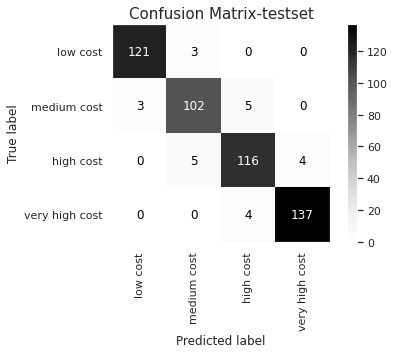

In [217]:
# plotting confusion matrix for test set.
plot_confusion_matrix(svm_optimal,X_test,y_test,cmap='Greys',display_labels=Class_cat,xticks_rotation='vertical')
plt.grid(False)
plt.title('Confusion Matrix-testset',fontsize=15)
plt.show()

In [218]:
#printing the classifiaction report of train set.
print(classification_report(y_train,y_train_pred))
     

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       376
           1       0.98      0.98      0.98       390
           2       0.97      0.98      0.98       375
           3       0.99      0.99      0.99       359

    accuracy                           0.99      1500
   macro avg       0.99      0.99      0.99      1500
weighted avg       0.99      0.99      0.99      1500



In [219]:
#printing the classifiaction report of train set.
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       124
           1       0.93      0.93      0.93       110
           2       0.93      0.93      0.93       125
           3       0.97      0.97      0.97       141

    accuracy                           0.95       500
   macro avg       0.95      0.95      0.95       500
weighted avg       0.95      0.95      0.95       500



**Observations:**

**Accuracy score on train set is 98.5% and Test score is 89%.*
*Model seems to be overfitted as the differance between train and test accuracy score is almot 10%.*

**After Hyperparameter tuning train accuracy remained almost same 98.3% and test accuracy score increased to 97%.*

**SVM performed very well as compared to other alogorithms.*
*In terms of feature importance RAM,Battery power,px_height and px_weight are the imporatant features.*

#3) Decision Tree Classifier

In [220]:
# Creating object of the decision tree.
dtc=DecisionTreeClassifier(random_state=0)

In [221]:

# fitting/training the train set.
dtc.fit(X_train,y_train)
     

DecisionTreeClassifier(random_state=0)

In [222]:

# Predicting y values of train and test data.
y_train_pred=dtc.predict(X_train)
y_pred=dtc.predict(X_test)
     

In [223]:
# Checking train set accuracy.
accuracy_score(y_train,y_train_pred)

1.0

In [224]:
# Checking test set accuracy
accuracy_score(y_test,y_pred)

0.826

In [225]:
# Confusion matrix for test set.
cf_matrix=confusion_matrix(y_test,y_pred)
print(cf_matrix)
acc3 = accuracy_score(y_test, y_pred)

[[112  12   0   0]
 [  9  85  16   0]
 [  0  15  91  19]
 [  0   1  15 125]]


In [226]:
print(f"Accuracy score: {acc3}")


Accuracy score: 0.826


In [227]:
# creating a class list
Class_cat = ['low cost','medium cost', 'high cost', 'very high cost']

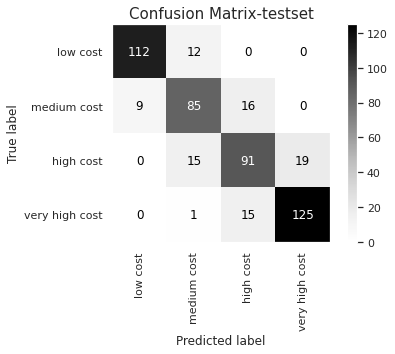

In [228]:
# plotting confusion matrix for test set.
plot_confusion_matrix(dtc,X_test,y_test,cmap='Greys',display_labels=Class_cat,xticks_rotation='vertical')
plt.grid(False)
plt.title('Confusion Matrix-testset',fontsize=15)
plt.show()
     

In [229]:
# Printing classification of train set.
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       376
           1       1.00      1.00      1.00       390
           2       1.00      1.00      1.00       375
           3       1.00      1.00      1.00       359

    accuracy                           1.00      1500
   macro avg       1.00      1.00      1.00      1500
weighted avg       1.00      1.00      1.00      1500



In [230]:
# printing classification of test set.
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.90      0.91       124
           1       0.75      0.77      0.76       110
           2       0.75      0.73      0.74       125
           3       0.87      0.89      0.88       141

    accuracy                           0.83       500
   macro avg       0.82      0.82      0.82       500
weighted avg       0.83      0.83      0.83       500



Train set accuracy is 100% and test accuracy is 84%.
*Model is overfitted on train set and did not generalised well.
We will tune hyperparamters to reduce overfitting and try to imporve the model performance.

**Let's tune some hypereparameters of Decsion Tree classifier**

In [231]:
# Cross validation

from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(dtc, param_grid = {'max_depth': (5, 30), 'max_leaf_nodes': (10, 100)}, scoring = 'accuracy', cv = 5, verbose = 24)
grid.fit(X_train, y_train)
     

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 1/5; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.770 total time=   0.0s
[CV 2/5; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 2/5; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.773 total time=   0.0s
[CV 3/5; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 3/5; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.767 total time=   0.0s
[CV 4/5; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 4/5; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.800 total time=   0.0s
[CV 5/5; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 5/5; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.793 total time=   0.0s
[CV 1/5; 2/4] START max_depth=5, max_leaf_nodes=100.............................
[CV 1/5; 2/4] END max_depth=5, max_leaf_node

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': (5, 30), 'max_leaf_nodes': (10, 100)},
             scoring='accuracy', verbose=24)

In [232]:
# Prediction

y_pred_test = grid.predict(X_test)
y_pres_train = grid.predict(X_train)
# Evaluation metrics for test

print('Classification Report for Decision Tree (Test set)= ')
print(classification_report(y_test, y_pred_test))

Classification Report for Decision Tree (Test set)= 
              precision    recall  f1-score   support

           0       0.93      0.92      0.93       124
           1       0.77      0.77      0.77       110
           2       0.72      0.71      0.72       125
           3       0.86      0.88      0.87       141

    accuracy                           0.82       500
   macro avg       0.82      0.82      0.82       500
weighted avg       0.82      0.82      0.82       500



[[114  10   0   0]
 [  8  85  17   0]
 [  0  15  89  21]
 [  0   0  17 124]]


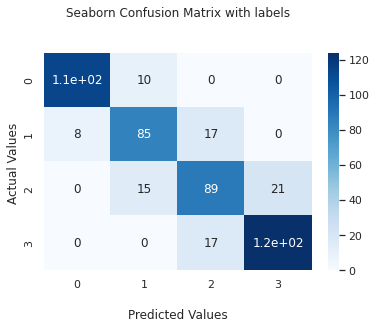

In [233]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_test)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()

In [234]:
# Evaluation metrics for train

print('Classification Report for Decision Tree (Train set)= ')
print(classification_report(y_train, y_pred_train))

Classification Report for Decision Tree (Train set)= 
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       376
           1       0.97      0.97      0.97       390
           2       0.98      0.97      0.97       375
           3       0.99      0.99      0.99       359

    accuracy                           0.98      1500
   macro avg       0.98      0.98      0.98      1500
weighted avg       0.98      0.98      0.98      1500



In [235]:
# creating a function for plotting the feature importances.
def plot_feature_importance(algo):
  ''' Takes the alogorithm as input and 
  plots the feature importance graph'''
  
  # get importance
  importance = algo.feature_importances_
  feat_importance=pd.DataFrame({'Features':x.columns,'score':importance}).sort_values(by='score',ascending=False)
  plt.figure(figsize=(10,8))
  sns.barplot(x=feat_importance['score'],y=feat_importance['Features'])
  plt.title('Feature Importance')
     

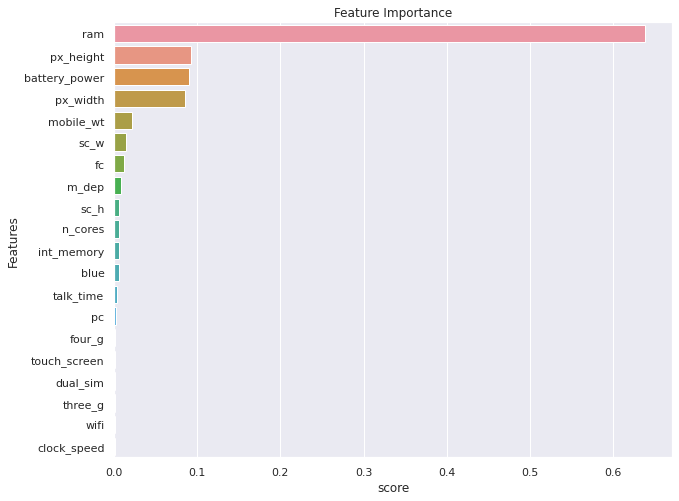

In [236]:
#plotting feature importances
plot_feature_importance(dtc)  

Train accuarcy has been reduced to 98% from 100% and test accuarcy is increased by 1% . Thus we somewhat reduced the overfiiting by reducing the training accuarcy. However this will not be good model for us.

*RAM,battery power,px_height and width came out to be the most important featrures*

*This model classified the class 0 and class 3 very nicely as we can see the AUC is almost 0.96 for both classes,whereas for class 1 and class 2 it is 0.88.*

#4) Random Forest classifier

In [237]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [238]:
from sklearn.ensemble import RandomForestClassifier
# taking 300 trees
clsr = RandomForestClassifier(n_estimators=300)
clsr.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300)

In [239]:
y_pred = clsr.predict(X_test)
test_score= accuracy_score(y_test, y_pred)
test_score
     

0.876

In [240]:
y_pred_train = clsr.predict(X_train)
train_score = accuracy_score(y_train, y_pred_train)
train_score

1.0

In [241]:
print(classification_report(y_test, y_pred))
     

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       124
           1       0.81      0.81      0.81       110
           2       0.81      0.77      0.79       125
           3       0.93      0.93      0.93       141

    accuracy                           0.88       500
   macro avg       0.87      0.87      0.87       500
weighted avg       0.87      0.88      0.87       500



In [242]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

print(cf_matrix)
acc4 = accuracy_score(y_test, y_pred)

[[122   2   0   0]
 [  8  89  13   0]
 [  0  19  96  10]
 [  0   0  10 131]]


In [243]:
print(f"Accuracy score: {acc4}")


Accuracy score: 0.876


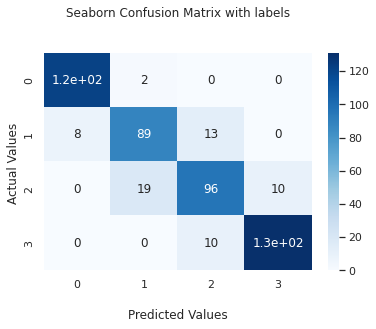

In [244]:
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()

In [245]:
feature_importance = pd.DataFrame({'Feature':x.columns,
                                   'Score':clsr.feature_importances_}).sort_values(by='Score', ascending=False).reset_index(drop=True)
feature_importance.head()

,Feature,Score
0,ram,0.464312
1,battery_power,0.076709
2,px_width,0.058230
3,px_height,0.057779
4,mobile_wt,0.040021


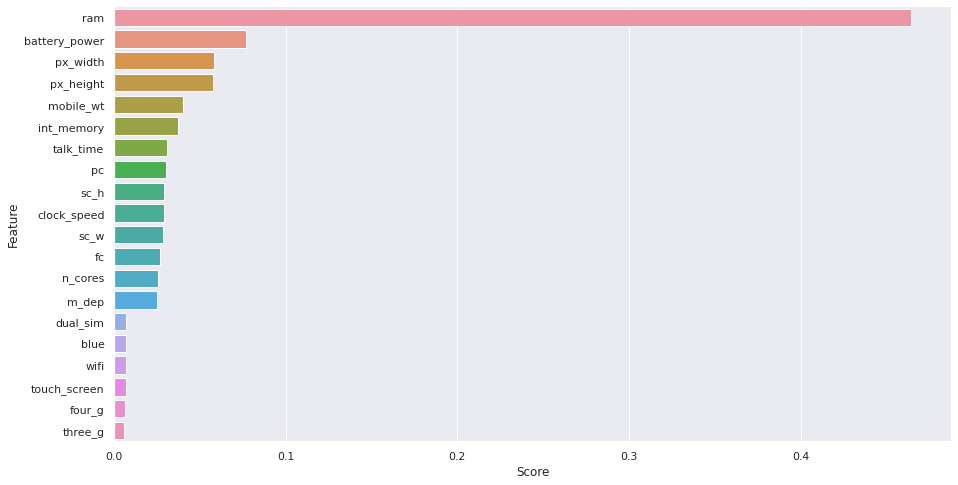

In [246]:
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.barplot(x=feature_importance['Score'], y=feature_importance['Feature'])
plt.show()

**Hyperparameter tuning for Random Forest.**

In [247]:
from sklearn.model_selection import GridSearchCV
params = {'n_estimators':[10,50,100,200],
          'max_depth':[10,20,30,40],
           'min_samples_split':[2,4,6],
          'max_features':['sqrt',4,'log2','auto'],
          'max_leaf_nodes':[10, 20, 40]
          }
rf = RandomForestClassifier()
clsr = GridSearchCV(rf, params, scoring='accuracy', cv=3)
clsr.fit(x, y)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 30, 40],
                         'max_features': ['sqrt', 4, 'log2', 'auto'],
                         'max_leaf_nodes': [10, 20, 40],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [10, 50, 100, 200]},
             scoring='accuracy')

In [248]:

clsr.best_params_

{'max_depth': 30,
 'max_features': 'log2',
 'max_leaf_nodes': 40,
 'min_samples_split': 4,
 'n_estimators': 200}

In [249]:

clsr.best_estimator_

RandomForestClassifier(max_depth=30, max_features='log2', max_leaf_nodes=40,
                       min_samples_split=4, n_estimators=200)

In [250]:
clsr.best_score_

0.8674926800863832

In [251]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
clsr = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features='log2',
                       max_leaf_nodes=40, max_samples=None,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
clsr.fit(X_train, y_train)
     

RandomForestClassifier(max_depth=30, max_features='log2', max_leaf_nodes=40,
                       min_samples_split=4, n_estimators=200)

In [252]:

y_pred = clsr.predict(X_test)
accuracy_score(y_test, y_pred)

0.875

In [253]:
y_pred = clsr.predict(X_test)
accuracy_score(y_test, y_pred)
     

0.875

In [254]:
print(classification_report(y_test, y_pred))
     

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       105
           1       0.85      0.81      0.83        91
           2       0.77      0.82      0.79        92
           3       0.93      0.89      0.91       112

    accuracy                           0.88       400
   macro avg       0.87      0.87      0.87       400
weighted avg       0.88      0.88      0.88       400



[[101   4   0   0]
 [  7  74  10   0]
 [  0   9  75   8]
 [  0   0  12 100]]


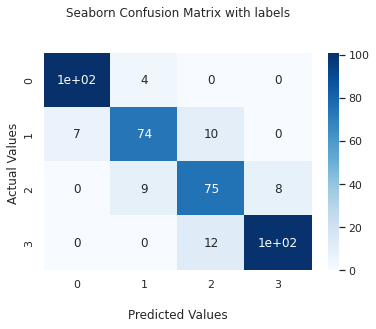

In [255]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()

In [256]:
y_pred = clsr.predict(X_train)
accuracy_score(y_train, y_pred)
     

0.951875

In [257]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       395
           1       0.93      0.92      0.93       409
           2       0.94      0.92      0.93       408
           3       0.98      0.98      0.98       388

    accuracy                           0.95      1600
   macro avg       0.95      0.95      0.95      1600
weighted avg       0.95      0.95      0.95      1600



In [258]:
feature_importance = pd.DataFrame({'Feature':x.columns,
                                   'Score':clsr.feature_importances_}).sort_values(by='Score', ascending=False).reset_index(drop=True)
feature_importance.head()

,Feature,Score
0,ram,0.674306
1,battery_power,0.066907
2,px_width,0.045585
3,px_height,0.044158
4,mobile_wt,0.025007


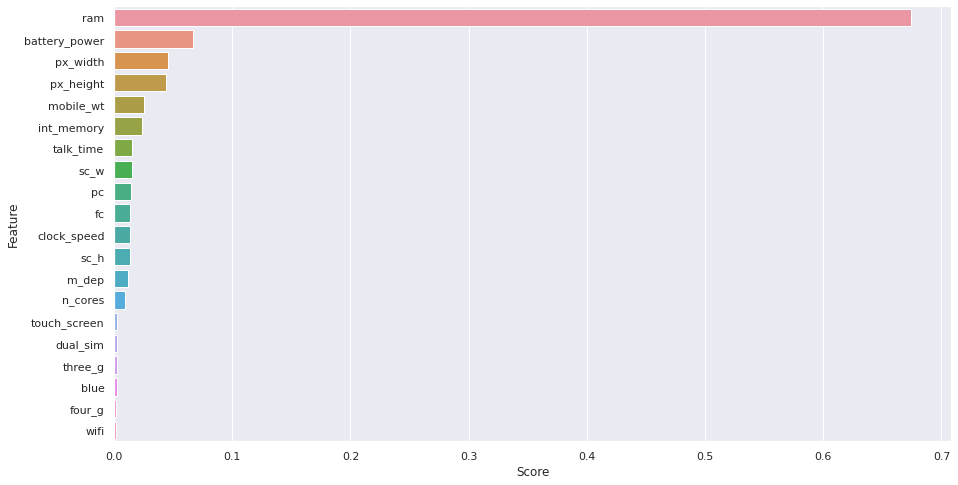

In [259]:
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.barplot(x=feature_importance['Score'], y=feature_importance['Feature'])
plt.show()

# **5)XGBoost Classifier**

In [260]:
xgb=XGBClassifier()        # creating an object of the classifier
xgb.fit(X_train,y_train)      # fitting the data 

XGBClassifier(objective='multi:softprob')

In [261]:
# predicting y values of train and test data.
y_train_pred=xgb.predict(X_train)
y_pred=xgb.predict(X_test)

In [262]:
# checking the accuracy score of train set 
accuracy_score(y_train,y_train_pred)

0.983125

In [263]:

# checking the accuracy score of test data.
accuracy_score(y_test,y_pred)

0.895

In [264]:
# printing the classification report of train set
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       395
           1       0.98      0.98      0.98       409
           2       0.96      0.98      0.97       408
           3       1.00      0.98      0.99       388

    accuracy                           0.98      1600
   macro avg       0.98      0.98      0.98      1600
weighted avg       0.98      0.98      0.98      1600



In [265]:
# Applying XGBoost

from xgboost import XGBClassifier

xgb = XGBClassifier(max_depth = 5, learning_rate = 0.1)
xgb.fit(X_train, y_train)
XGBClassifier(max_depth=5, objective='multi:softprob')
# Prediction

y_pred_train = xgb.predict(X_train)
y_pred_test = xgb.predict(X_test)
# Evaluation metrics for test

score = classification_report(y_test, y_pred_test)
print('Classification Report for XGBoost(Test set)= ')
print(score)

Classification Report for XGBoost(Test set)= 
              precision    recall  f1-score   support

           0       0.96      0.93      0.95       105
           1       0.83      0.95      0.89        91
           2       0.88      0.83      0.85        92
           3       0.94      0.92      0.93       112

    accuracy                           0.91       400
   macro avg       0.91      0.91      0.90       400
weighted avg       0.91      0.91      0.91       400



***Train accuracy = 98%* *Test Accuarcy= 91 %***

In [266]:
# Evaluation metrics for train

score = classification_report(y_train, y_pred_train)
print('Classification Report for XGBoost(Train set)= ')
print(score)
     

Classification Report for XGBoost(Train set)= 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       395
           1       1.00      1.00      1.00       409
           2       1.00      1.00      1.00       408
           3       1.00      1.00      1.00       388

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



**Hyperparameter tuning for XGBoost Classifier:**

In [267]:
# Cross validation

grid = GridSearchCV(xgb, param_grid={'n_estimators': (10, 200), 'learning_rate': [1, 0.5, 0.1, 0.01, 0.001], 'max_depth': (5, 10),
                                     'gamma': [1.5, 1.8], 'subsample': [0.3, 0.5, 0.8]}, cv = 5, scoring = 'accuracy', verbose = 10)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV 1/5; 1/120] START gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3
[CV 1/5; 1/120] END gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3;, score=0.863 total time=   0.1s
[CV 2/5; 1/120] START gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3
[CV 2/5; 1/120] END gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3;, score=0.869 total time=   0.3s
[CV 3/5; 1/120] START gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3
[CV 3/5; 1/120] END gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3;, score=0.859 total time=   0.1s
[CV 4/5; 1/120] START gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3
[CV 4/5; 1/120] END gamma=1.5, learning_rate=1, max_depth=5, n_estimators=10, subsample=0.3;, score=0.834 total time=   0.1s
[CV 5/5; 1/120] START gamma=1.5, learning_rate=1, max_depth=5

GridSearchCV(cv=5,
             estimator=XGBClassifier(max_depth=5, objective='multi:softprob'),
             param_grid={'gamma': [1.5, 1.8],
                         'learning_rate': [1, 0.5, 0.1, 0.01, 0.001],
                         'max_depth': (5, 10), 'n_estimators': (10, 200),
                         'subsample': [0.3, 0.5, 0.8]},
             scoring='accuracy', verbose=10)

In [268]:
# Prediction

y_pred_train = grid.predict(X_train)
y_pred_test = grid.predict(X_test)
# Evaluation metrics for test

score = classification_report(y_test, y_pred_test)
print('Classification Report for tuned XGBoost(Test set)= ')
print(score)
     

Classification Report for tuned XGBoost(Test set)= 
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       105
           1       0.89      0.92      0.91        91
           2       0.86      0.87      0.86        92
           3       0.94      0.91      0.93       112

    accuracy                           0.92       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.92      0.92      0.92       400



In [269]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_test)
print(cm)
acc5 = accuracy_score(y_test, y_pred_test)

[[101   4   0   0]
 [  4  84   3   0]
 [  0   6  80   6]
 [  0   0  10 102]]


[[101   4   0   0]
 [  4  84   3   0]
 [  0   6  80   6]
 [  0   0  10 102]]


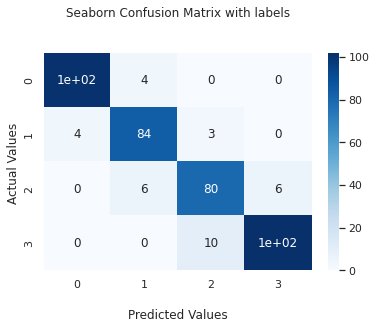

In [270]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_test)

print(cf_matrix)


ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()

In [271]:
# Evaluation metrics for train

score = classification_report(y_train, y_pred_train)
print('Classification Report for tuned XGBoost(Train set)= ')
print(score)

Classification Report for tuned XGBoost(Train set)= 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       395
           1       0.98      0.98      0.98       409
           2       0.98      0.99      0.99       408
           3       1.00      0.99      0.99       388

    accuracy                           0.99      1600
   macro avg       0.99      0.99      0.99      1600
weighted avg       0.99      0.99      0.99      1600



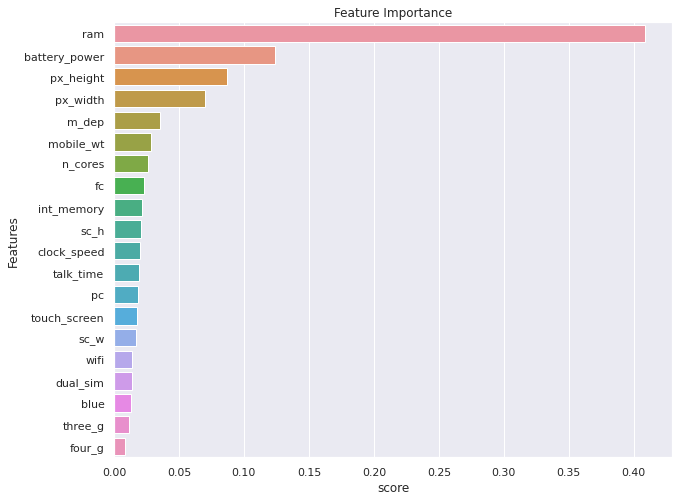

In [272]:
#plotting feature importances
plot_feature_importance(xgb)

**Observation:**
Before hyperparameter Tuning*

*Train Accuarcy = 98%*
*Test Accuarcy = 91%*
*After hyperparameter Tuning*

*Train Accuarcy = 1%*
*Test Accuarcy = 92%*
*we have improved the model performance by Hyperparamter tuning. Test accuracy is increased to 92%.But still the difference of accuracy score between train and test is more than 5%.We can say model is very slightly overfitted*


# **Create visualization for all model with their Accuracy**

In [273]:
mylist=[]
mylist2=[]
mylist.append(acc1)
mylist2.append("Logistic Regression")
mylist.append(acc2)
mylist2.append("SVM")
mylist.append(acc3)
mylist2.append("Decision Tree")
mylist.append(acc4)
mylist2.append("Random forest Classifier")
mylist.append(acc5)
mylist2.append("XGBoost")


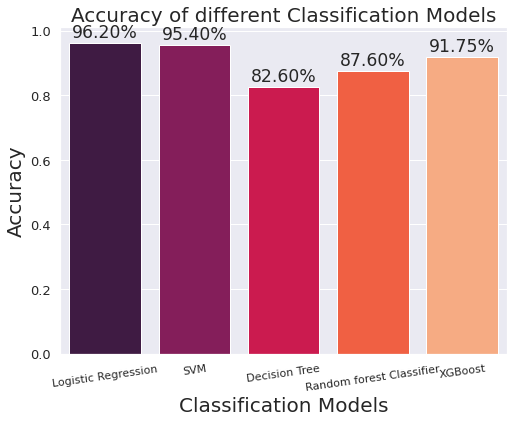

In [274]:
plt.rcParams['figure.figsize']=8,6
sns.set_style("darkgrid")
ax = sns.barplot(x=mylist2, y=mylist, palette = "rocket", saturation =1.5)
plt.xlabel("Classification Models", fontsize = 20 )
plt.ylabel("Accuracy", fontsize = 20)
plt.title("Accuracy of different Classification Models", fontsize = 20)
plt.xticks(fontsize = 11, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()